In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Equation of Motion (Linear Air Drag)

$$
\frac{dv}{dt} = g - k v
$$

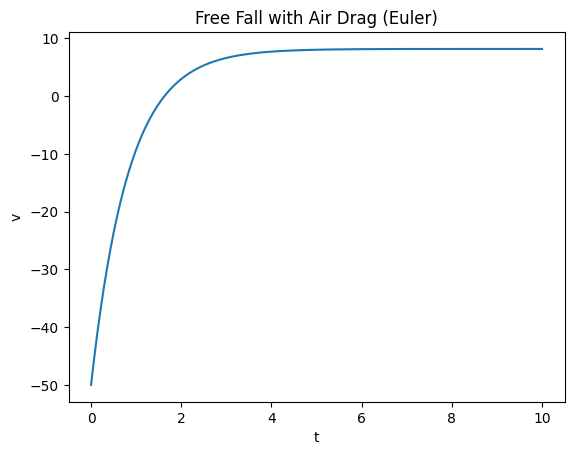

In [3]:
g = 9.81
k = 1.2
dt = 0.01
T = 10
N = int(T/dt)

t = np.linspace(0, T, N)
v = np.zeros(N)
v[0] = -50

for n in range(N-1):
    v[n+1] = v[n] + (g - k*v[n])*dt

plt.plot(t, v)
plt.xlabel("t")
plt.ylabel("v")
plt.title("Free Fall with Air Drag (Euler)")
plt.show()

$$
\frac{\partial \rho(x,t)}{\partial t}
=
D \frac{\partial^2 \rho(x,t)}{\partial x^2}
$$

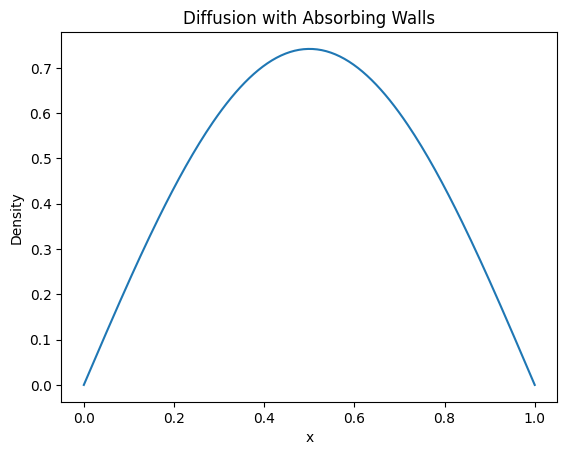

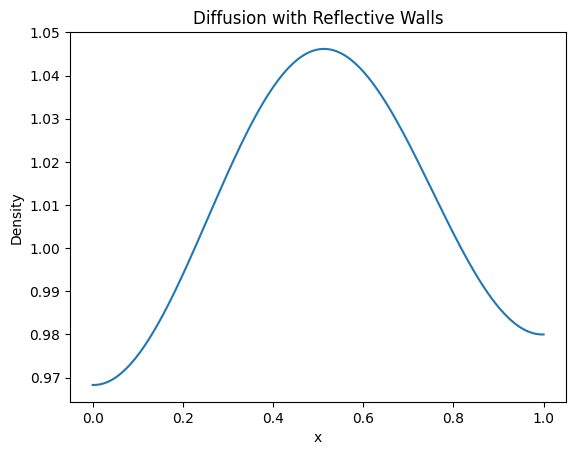

In [4]:
L = 1.0          
Nx = 200         
dx = L / Nx

D = 0.1          
dt = 0.4 * dx**2 / D   
Nt = 10000         

x = np.linspace(0, L, Nx)
rho = np.zeros(Nx)
rho[Nx // 2] = 1.0 / dx   

rho_abs = rho.copy()

for n in range(Nt):
    rho_new = rho_abs.copy()
    for i in range(1, Nx-1):
        rho_new[i] = rho_abs[i] + D*dt/dx**2 * (rho_abs[i+1] - 2*rho_abs[i] + rho_abs[i-1])
    rho_abs = rho_new

plt.plot(x, rho_abs)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion with Absorbing Walls")
plt.show()

rho_ref = rho.copy()

for n in range(Nt):
    rho_new = rho_ref.copy()

    for i in range(1, Nx-1):
        rho_new[i] = rho_ref[i] + D*dt/dx**2 * (
            rho_ref[i+1] - 2*rho_ref[i] + rho_ref[i-1]
        )

    
    rho_new[0]  = rho_new[1]
    rho_new[-1] = rho_new[-2]

    rho_ref = rho_new

plt.plot(x, rho_ref)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion with Reflective Walls")
plt.show()

## Poiseuille Flow Between Parallel Plates

Poiseuille flow describes steady, laminar flow of a viscous Newtonian fluid
driven by a constant pressure gradient between two stationary, parallel plates.
The fluid flows in the x-direction, while the velocity varies only in the
transverse y-direction.

### Physical Assumptions
- Steady-state flow
- Incompressible fluid
- Laminar regime (low Reynolds number)
- Velocity field of the form u = u(y)
- No-slip boundary conditions at the walls

### Governing Equation

The Navier–Stokes equation reduces to the balance between viscous forces and the
pressure gradient:

```text
η d²u(y) / dy² = dp / dx
```

where:
- u(y) is the fluid velocity
- η is the dynamic viscosity
- dp/dx is the constant pressure gradient driving the flow

### Boundary Conditions

```text
u(0) = 0
u(L) = 0
```

### Analytical Solution

```text
u(y) = (1 / (2η)) (dp / dx) y (L − y)
```

The resulting velocity profile is parabolic, with maximum velocity at the
center of the channel and zero velocity at the walls, reflecting the balance
between pressure-driven flow and viscous resistance.

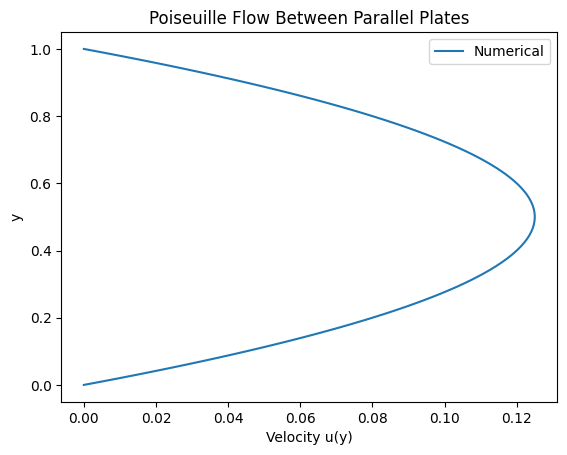

In [5]:
L = 1.0         
Ny = 100        
dy = L / (Ny - 1)

eta = 1.0        
dpdx = -1.0     

y = np.linspace(0, L, Ny)

A = np.zeros((Ny, Ny))
b = np.zeros(Ny)

for i in range(1, Ny-1):
    A[i, i-1] = 1
    A[i, i]   = -2
    A[i, i+1] = 1
    b[i] = dpdx * dy**2 / eta

A[0, 0] = 1
A[-1, -1] = 1
b[0] = 0
b[-1] = 0

u_numeric = np.linalg.solve(A, b)

plt.plot(u_numeric, y, label="Numerical")
plt.xlabel("Velocity u(y)")
plt.ylabel("y")
plt.title("Poiseuille Flow Between Parallel Plates")
plt.legend()
plt.show()